In [ ]:
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/objective_comparison_of_methods_to_radiologist'

In [ ]:
csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/atrophy_to_radiologist/correlation_to_radiologist.csv'

Create Your Own Data PRN

In [ ]:
data = {
    'Frontal Lobe': {'CSF': 0.49, 'Surface': -0.03, 'GM': -0.14, 'WM': -0.07},
    'Parietal Lobe': {'CSF': 0.39, 'Surface': -0.06, 'GM': -0.19, 'WM': -0.16},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.03, 'GM': 0.21, 'WM': 0.27 },
    'Temporal Lobe': {'CSF': 0.56, 'Surface': 0.57, 'GM': 0.25, 'WM': 0.07},
    'Mesial Temporal Lobe': {'CSF': 0.66, 'Surface': 0.42, 'GM': 0.25, 'WM': 0.27},
    'Cerebellum': {'CSF': 0.40, 'Surface': 0.01, 'GM': -.23, 'WM': -.16 },
    'Ventriculomegaly': {'CSF': 0.78, 'Surface': 0.01, 'GM': -0.09, 'WM': 0.04 },
}

In [ ]:
import pandas as pd
df = pd.read_csv(csv_path)
df

In [ ]:
# Melt the DataFrame to reshape it for plotting
melted = pd.melt(df, id_vars=['AtrophyMethod', 'Smooth'], value_vars=['Cerebellum Rho', 'MTL Rho', 'Subcortex Rho', 'Temporal Rho', 'Parietal Rho', 'Frontal Rho', 'Occipital Rho'])
melted
# Group the melted DataFrame by Smooth and variable, and calculate the median
# grouped = melted.groupby(['Smooth', 'variable'])['value'].median().reset_index()
# grouped

In [ ]:
# Melt the DataFrame to reshape it for plotting
melted = pd.melt(df, id_vars=['AtrophyMethod', 'Smooth'], value_vars=['Cerebellum Rho', 'MTL Rho', 'Subcortex Rho', 'Temporal Rho', 'Parietal Rho', 'Frontal Rho', 'Occipital Rho'])
melted
# Group the melted DataFrame by AtrophyMethod, Smooth, and variable, and calculate the median
# grouped = melted.groupby(['AtrophyMethod', 'Smooth'])['value'].median().reset_index()


/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_15304/1424755675.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Smooth', y='value', hue='AtrophyMethod', style='AtrophyMethod', markers=False, dashes=False, palette=palette, hue_order=None, style_order=None, units=None, estimator='mean', ci=None, sort=True, err_style=None, err_kws=None, legend='full', ax=None)
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_15304/1424755675.py:24: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=df, x='Smooth', y='value', hue='AtrophyMethod', style='AtrophyMethod', markers=False, dashes=False, palette=palette, hue_order=None, style_order=None, units=None, estimator='mean', ci=None, sort=True, err_style=None, err_kws=None, legend='full', ax=None)


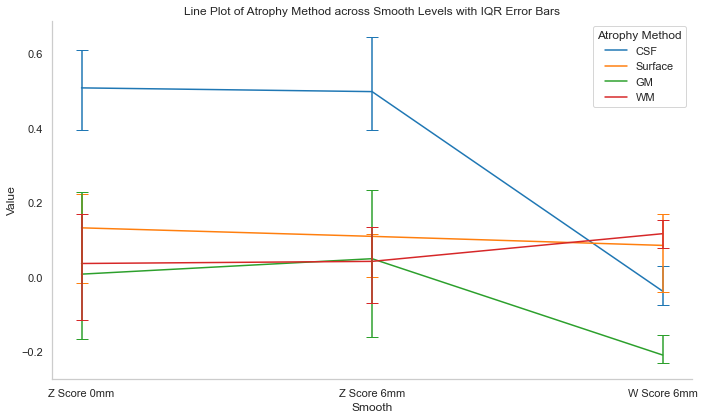

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
df=melted
df['Smooth'] = pd.Categorical(df['Smooth'], categories=['Z Score 0mm', 'Z Score 6mm', 'W Score 6mm'], ordered=True)

# Calculate the median and quartiles for each group
grouped = df.groupby(['AtrophyMethod', 'Smooth'])['value']
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)
iqr = q3 - q1

# Define color palette
palette = sns.color_palette('tab10')
X_ORDER = ['Z Score 0mm', 'Z Score 6mm', 'W Score 6mm']


# Plotting
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='Smooth', y='value', hue='AtrophyMethod', style='AtrophyMethod', markers=True, dashes=False, palette=palette, hue_order=None, style_order=None, units=None, estimator='mean', ci=None, sort=True, err_style=None, err_kws=None, legend='full', ax=None)
sns.lineplot(data=df, x='Smooth', y='value', hue='AtrophyMethod', style='AtrophyMethod', markers=False, dashes=False, palette=palette, hue_order=None, style_order=None, units=None, estimator='mean', ci=None, sort=True, err_style=None, err_kws=None, legend='full', ax=None)
# Adding error bars using IQR
for i, atrophy_method in enumerate(df['AtrophyMethod'].unique()):
    for j, smooth in enumerate(['Z Score 0mm', 'Z Score 6mm', 'W Score 6mm']):  # Use the ordered levels
        y = medians[atrophy_method, smooth]
        lower = q1[atrophy_method, smooth]
        upper = q3[atrophy_method, smooth]
        color = palette[i]  # Use the same color as the line plot
        plt.errorbar(j, y, yerr=[[y - lower], [upper - y]], color=color, capsize=6)

plt.legend(title='Atrophy Method', loc='upper right')
plt.title('Line Plot of Atrophy Method across Smooth Levels with IQR Error Bars')
plt.xlabel('Smooth')
plt.ylabel('Value')
plt.tight_layout()
sns.despine()
plt.grid(False)
plt.savefig(os.path.join(out_dir, 'error_plot.svg'))

plt.show()


Exptl